# Data Preprocessing


## Mean Computation

The mean() is a built-in Python statistics module function used to calculate the average of numbers and lists. The mean() returns the mean of the data set passed as parameters. To use the mean() method in the Python program, import the Python statistics module, and then we can use the mean function to return the mean of the given list. See the following example.

In [1]:
import statistics

data = [11, 21, 11, 19, 46, 21, 19, 29, 21, 18, 3, 11, 11]

x = statistics.mean(data)
print(x)

y = statistics.median(data)
print(y)

z = statistics.mode(data)
print(z)

a = statistics.stdev(data)
print(a)

b = statistics.variance(data)
print(b)

18.53846153846154
19
11
10.611435534486562
112.6025641025641


Using numpy.mean() function
NumPy.mean() function returns the average of the array elements. The average is taken over the flattened array by default, otherwise over the specified axis.

Numpy library is a commonly used library to work on large multi-dimensional arrays. It also has an extensive collection of mathematical functions to be used on arrays to perform various tasks. One important thing to note here is that the mean() function will give us the average for the list given.


In [2]:
from numpy import mean
number_list = [19, 21, 46, 11, 18]
avg = mean(number_list)
print("The average of List is ", round(avg, 2))

The average of List is  23.0


## Imputation 

### Examples

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('/Users/salahkaf/Desktop/NanDataset.csv')
df

,A,B,C,D
0,1,2.0,3.0,'Good'
1,4,NaN,6.0,'Good'
2,7,NaN,9.0,'Excellent'
3,10,11.0,12.0,NaN
4,13,14.0,15.0,'Excellent'
5,16,17.0,NaN,'Fair'
6,19,12.0,12.0,'Excellent'
7,20,11.0,23.0,'Fair'


In [4]:
df['B'] = df['B'].fillna(df['B'].mean())
df

,A,B,C,D
0,1,2.000000,3.0,'Good'
1,4,11.166667,6.0,'Good'
2,7,11.166667,9.0,'Excellent'
3,10,11.000000,12.0,NaN
4,13,14.000000,15.0,'Excellent'
5,16,17.000000,NaN,'Fair'
6,19,12.000000,12.0,'Excellent'
7,20,11.000000,23.0,'Fair'


In [5]:
df['D'] = df['D'].fillna(df['D'].value_counts().index[0]) # most repetitive one
df

,A,B,C,D
0,1,2.000000,3.0,'Good'
1,4,11.166667,6.0,'Good'
2,7,11.166667,9.0,'Excellent'
3,10,11.000000,12.0,'Excellent'
4,13,14.000000,15.0,'Excellent'
5,16,17.000000,NaN,'Fair'
6,19,12.000000,12.0,'Excellent'
7,20,11.000000,23.0,'Fair'


## Data Preprocessing - Binning


Data binning (or bucketing) groups data in bins (or buckets), in the sense that **it replaces values contained into a small interval with a single representative value for that interval.** Sometimes binning improves accuracy in predictive models.

Data binning is a type of data preprocessing, a mechanism which includes also dealing with missing values, formatting, normalization and standardization.

**Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.**

convert numeric to categorical includes binning by distance and binning by frequency
reduce numeric values includes quantisation (or sampling).
Binning is a technique for data smoothing. Data smoothing is employed to remove noise from data. Three techniques for data smoothing:

binning
regression
outlier analysis


In [6]:
import pandas as pd
df = pd.read_csv('/Users/Salahkaf/Desktop/cupcake.csv')
df.head(5)

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5


## Binning by distance

In this case we define the edges of each bin. In Python pandas binning by distance is achieved by means of thecut() function.
We group values related to the column Cupcake into three groups: small, medium and big. In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group. We exploit the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column Cupcake.

In [7]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

4
100


Now we can calculate the range of each interval, i.e. the minimum and maximum value of each interval. Since we have 3 groups, we need 4 edges of intervals (bins):

small — (edge1, edge2)

medium — (edge2, edge3)

big — (edge3, edge4)

We can use the linspace() function of the numpy package to calculate the 4 bins, equally distributed.


In [8]:
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([  4.,  36.,  68., 100.])

In [9]:
labels = ['small', 'medium', 'big']

We can use the cut() function to convert the numeric values of the column Cupcake into the categorical values. We need to specify the bins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [10]:
df['bins'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)

We can plot the distribution of values, by using the hist() function of the matplotlib package.

<AxesSubplot:>

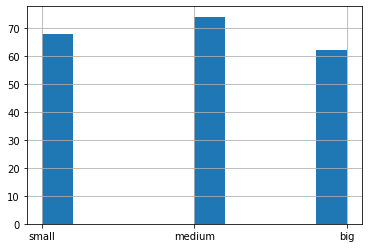

In [11]:
df['bins'].hist()

In [12]:
df['bins']

0       small
1       small
2       small
3       small
4       small
        ...  
199    medium
200    medium
201    medium
202    medium
203    medium
Name: bins, Length: 204, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']

In [13]:
df.head()

,Mese,Cupcake,bins
0,2004-01,5,small
1,2004-02,5,small
2,2004-03,4,small
3,2004-04,6,small
4,2004-05,5,small


In [14]:
df.groupby(['bins']).count()

,Mese,Cupcake
bins,,
small,68,68
medium,74,74
big,62,62


## Binning by frequency

Binning by frequency calculates the size of each bin so that each bin contains the (almost) same number of observations, but the bin range will vary. We can use the Python pandas qcut() function. We can set the precision parameter to define the number of decimal points.

In [15]:
df['bin_qcut'] = pd.qcut(df['Cupcake'], q=3, precision=1, labels=labels)

In [16]:
df['bin_qcut']

0       small
1       small
2       small
3       small
4       small
        ...  
199    medium
200    medium
201    medium
202    medium
203    medium
Name: bin_qcut, Length: 204, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']

In [17]:
df.groupby(['bin_qcut']).count()

,Mese,Cupcake,bins
bin_qcut,,,
small,68,68,68
medium,68,68,68
big,68,68,68


## Data Preprocessing - Normalization

Data Normalization involves adjusting values measured on different scales to a common scale.

Normalization applies only to columns containing numeric values. Five methods of normalization exist:

single feature scaling

min max

z-score

log scaling

clipping


All the scikit-learn operations described in this tutorial follow the following steps:

select a preprocessing methodology
fit it through the fit() function
apply it to data through the transform() function.
The scikit-learn library works only with arrays, thus when performing every operation, a dataframe column must be converted to an array. This can be achieved through the numpy.array() function, which receives the dataframe column as input. In addition, the fit() function receives as input an array of arrays, each representing a sample of the dataset. Thus the reshape() function could be used to convert a standard array to an array of arrays.

## Data Import
As example dataset, in this tutorial we consider the dataset provided by the Italian Protezione Civile, related to the number of COVID-19 cases registered since the beginning of the COVID-19 pandemic. The dataset is updated daily and can be downloaded from this link.

First of all, we need to import the Python pandas library and read the dataset through the read_csv() function. Then we can drop all the columns with NaN values. This is done through dropna() function.

In [18]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
print(df.isnull().sum())
df.head(10)

data                                          0
stato                                         0
codice_regione                                0
denominazione_regione                         0
lat                                           0
long                                          0
ricoverati_con_sintomi                        0
terapia_intensiva                             0
totale_ospedalizzati                          0
isolamento_domiciliare                        0
totale_positivi                               0
variazione_totale_positivi                    0
nuovi_positivi                                0
dimessi_guariti                               0
deceduti                                      0
casi_da_sospetto_diagnostico              13671
casi_da_screening                         13671
totale_casi                                   0
tamponi                                       0
casi_testati                               1155
note                                    

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Single Feature Scaling¶
Single Feature Scaling converts every value of a column into a number between 0 and 1. The new value is calculated as the current value divided by the max value of the column. This can be done through the MaxAbsScaler class. We apply the scaler to the tamponi column, which mut be converted to array and reshaped.

In [19]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

X = np.array(df['tamponi']).reshape(-1,1)
scaler = MaxAbsScaler()

Now we can fit the scaler and then apply the transformation. We convert it to the original shape by applying the inverse reshape() function and we store the result into a new column of the datafram df.

In [20]:
scaler.fit(X)
X_scaled = scaler.transform(X)
df['single feature scaling'] = X_scaled.reshape(1,-1)[0]
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,single feature scaling
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340589e-07
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-08
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-07
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.968144e-06


The scikit-learn library also provides a function to restore the original values, given the transormation. This function also works for the transformations described later in this article.

In [21]:
scaler.inverse_transform(X_scaled)

array([[5.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       ...,
       [4.2690310e+06],
       [5.1419500e+05],
       [2.9640301e+07]])

## Min Max¶
Similarly to Single Feature Scaling, Min Max converts every value of a column into a number between 0 and 1. The new value is calculated as the difference between the current value and the min value, divided by the range of the column values. In scikit-learn we use the MinMaxScaler class. For example, we can apply the min max method to the column totale_casi.

In [22]:
from sklearn.preprocessing import MinMaxScaler
X = np.array(df['totale_casi']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['min max'] = X_scaled.reshape(1,-1)[0]
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,single feature scaling,min max
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340589e-07,0.000000
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-08,0.000000
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-07,0.000000
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.968144e-06,0.000006



## z-score
Z-Score converts every value of a column into a number around 0. Typical values obtained by a z-score transformation range from -3 and 3. The new value is calculated as the difference between the current value and the average value, divided by the standard deviation. In scikit-learn we can use the StandardScaler function. For example, we can calculate the z-score of the column deceduti.

In [23]:
from sklearn.preprocessing import StandardScaler

X = np.array(df['deceduti']).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['z score'] = X_scaled.reshape(1,-1)[0]
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,single feature scaling,min max,z score
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340589e-07,0.000000,-0.66237
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,-0.66237
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-08,0.000000,-0.66237
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681178e-07,0.000000,-0.66237
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.968144e-06,0.000006,-0.66237


For more details, you can give a look at this link
<a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html">this link</a>